#### Predicting if the loan fully paid or not

###### Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [37]:
import warnings
warnings.filterwarnings(action='ignore')

### Loading the Data

In [2]:
## Lendingclub loan dataset
data_set = pd.read_csv('data/loan_data.csv')

In [3]:
data_set.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data_set.shape

(9578, 14)

##### Info

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### Statastical information

In [6]:
data_set.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#### Checkig the co-relation of the column
data_set.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


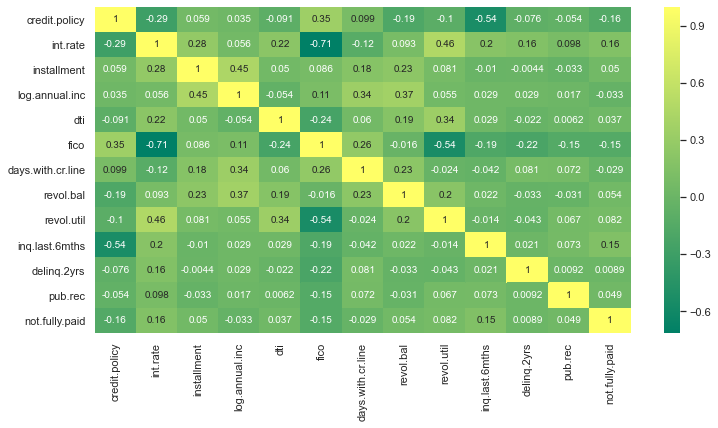

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(data_set.corr(),cmap='summer',annot=True);

In [13]:
##checking the credit.policy with fico
df = data_set.copy()

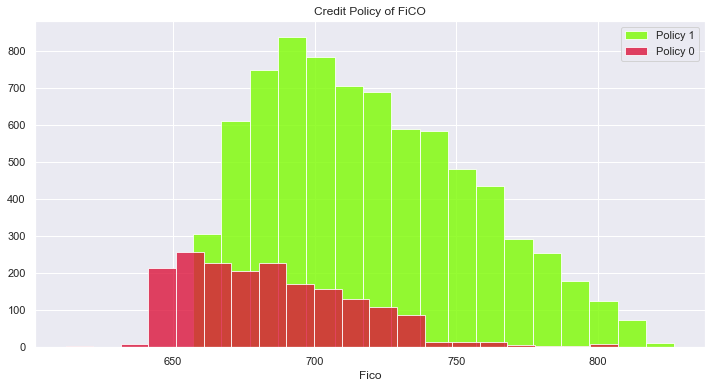

In [20]:
plt.figure(figsize=(12,6))

df[df['credit.policy']==1]['fico'].hist(bins=20,color='lawngreen',label='Policy 1',alpha=0.8)

df[df['credit.policy']==0]['fico'].hist(bins=20,color='crimson',label='Policy 0',alpha=0.8)

plt.legend()

plt.xlabel('Fico')
plt.title('Credit Policy of FiCO')
plt.show()

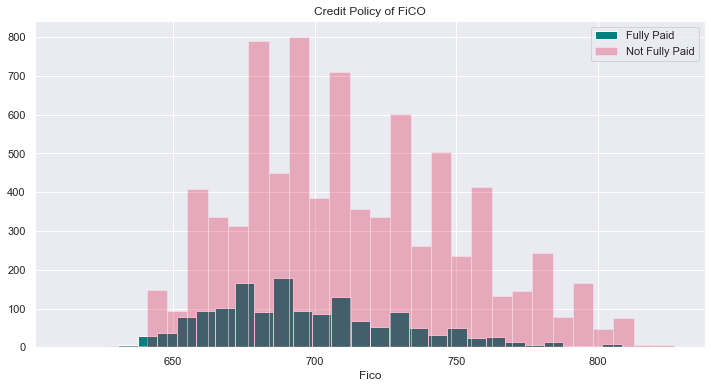

In [26]:
plt.figure(figsize=(12,6))

df[df['not.fully.paid']==1]['fico'].hist(bins=30,color='teal',label='Fully Paid')

df[df['not.fully.paid']==0]['fico'].hist(bins=30,color='crimson',label='Not Fully Paid',alpha=0.3)

plt.legend()

plt.xlabel('Fico')
plt.title('Credit Policy of FiCO')
plt.show()

In [27]:
#loan by purpose
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

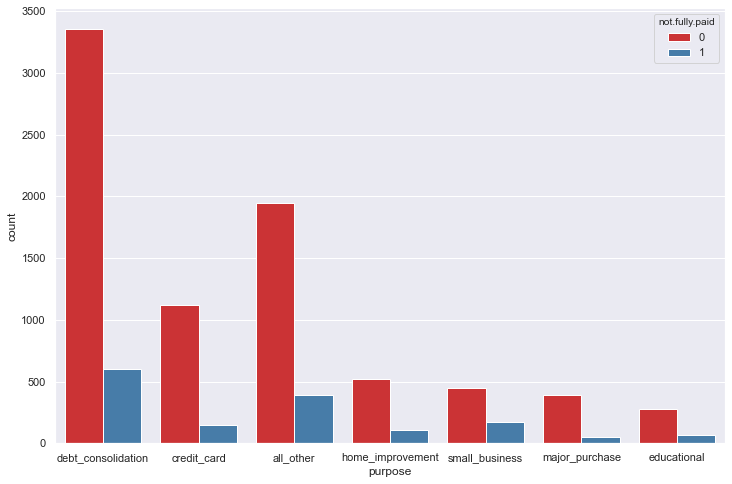

In [34]:
#visualize with not fully paid
plt.figure(figsize=(12,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1');

In [35]:
#checking the LM Plot for fico and not fully paid(Trend)

<Figure size 864x432 with 0 Axes>

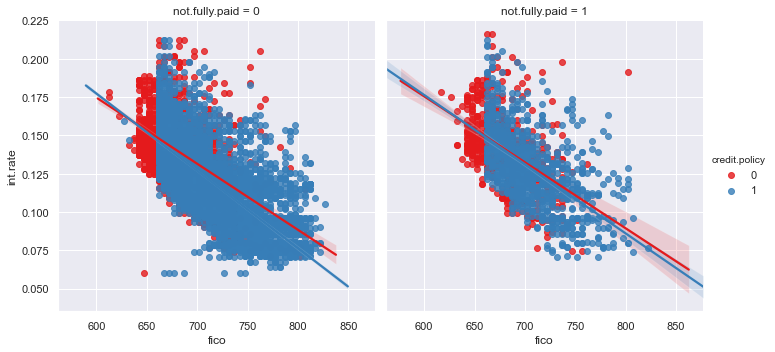

In [44]:
plt.figure(figsize=(12,6))
sns.lmplot(x='fico',y ='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')
plt.show()

In [45]:
##
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [46]:
df['purpose'].dtype

dtype('O')

In [47]:
df['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

#### Creting dummy data

In [48]:
data = pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

#### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
featured_x = data.drop('not.fully.paid',axis=1)
target_y = data['not.fully.paid']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2,random_state=123)

In [53]:
x_train.shape,y_train.shape

((7662, 18), (7662,))

In [54]:
x_test.shape,y_test.shape

((1916, 18), (1916,))

#### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf_tree = DecisionTreeClassifier()

In [57]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
clf_tree.score(x_test,y_test)

0.7338204592901879

#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf_forest = RandomForestClassifier()

In [61]:
clf_forest.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
clf_forest.score(x_test,y_test)

0.8382045929018789

################ CHecking Confusion matrix and classification report

In [66]:
tree_preds = clf_tree.predict(x_test)

In [67]:
forest_preds = clf_forest.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

#### Decision Tree

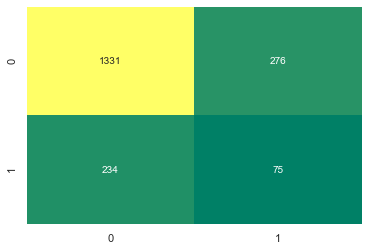

In [71]:
sns.heatmap(confusion_matrix(y_test,tree_preds),annot=True,cbar=False,cmap='summer',fmt='2d');

#### RandomFOrest

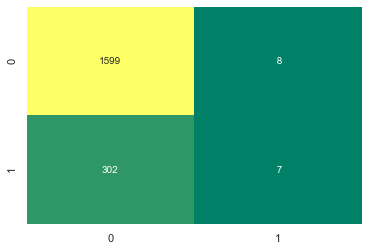

In [72]:
sns.heatmap(confusion_matrix(y_test,forest_preds),annot=True,cbar=False,cmap='summer',fmt='2d');

#### CLassification Report

##### Decision Tree

In [73]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1607
           1       0.21      0.24      0.23       309

    accuracy                           0.73      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.75      0.73      0.74      1916



##### RandomForest

In [74]:
print(classification_report(y_test,forest_preds))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1607
           1       0.47      0.02      0.04       309

    accuracy                           0.84      1916
   macro avg       0.65      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916

